In [14]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


def refactor(dataset, label):
    return dataset[label].apply(lambda x:
                           np.fromstring(
                               x.replace('\n', '')
                                .replace('[', '')
                                .replace(']', '')
                                .replace('  ', ' '), sep=' '))[0]
    
def draw_figure(x, y1, y2, labelx, labely1, labely2):
    fig, host = plt.subplots()
    fig.subplots_adjust(right=0.75)
    par1 = host.twinx()
    par1.set_ylabel(labely2)
    p1, = host.plot(x, y1, label=labely1)
    p2, = par1.plot(x, y2, label=labely2, color='r')
    host.set_ylabel(labely1)
    host.set_xlabel(labelx)
    host.tick_params(axis='y', colors=p1.get_color())
    par1.tick_params(axis='y', colors=p2.get_color())
    plt.grid()
    plt.draw()
    plt.show()
    
def superpose_figure(x1, y1, x2, y2, labelx, labely):
    plt.plot(x1, y1, 'r', label='AS')
    plt.plot(x2, y2, 'b', label='FPO')
    plt.xlabel(labelx)
    plt.ylabel(labely)
    plt.legend(loc='upper left')
    plt.grid()
    plt.draw()
    plt.show()
    

In [6]:
path = os.getcwd()
print(path)
input = pd.read_csv(path + "/Results/analysis_single_input_1-new.csv")
output = pd.read_csv(path + "/Results/analysis_single_output_1-new.csv")
fpo_output = pd.read_excel(
    "/Users/to127534/MDO_Projects/MissionDetails_DOC_Mission.xls", index_col=None)
fpo_output.drop(columns=fpo_output.columns[0],
                axis=1,
                inplace=True)
fpo_output.drop(columns=fpo_output.columns[0],
                axis=1,
                inplace=True)
fpo_output.drop(columns=fpo_output.columns[0],
                axis=1,
                inplace=True)
fpo_output = fpo_output.drop(range(100, 168))
print(fpo_output.shape)
print(fpo_output.columns)
fpo_output.head()


/Users/to127534/MDO_Projects/MDOAirB_base/framework
(100, 21)
Index(['ALT (ft)', 'WGHT (kg)', 'DIST (nm)', 'TIME (mn)', 'FUEL (kg)', 'MACH',
       'CAS (kt)', 'TAS (kt)', 'RATE (ftmn)', 'GRDT (deg)', 'ALPH (deg)',
       'SR (nmkg)', '100CL', '100CD', 'L/D', 'PWS (hp)', 'WFE (kg/h)',
       'FN (dan)', 'SFC (khdn)', 'PCFN (%)', 'DT (dg.c)'],
      dtype='object')


,ALT (ft),WGHT (kg),DIST (nm),TIME (mn),FUEL (kg),MACH,CAS (kt),TAS (kt),RATE (ftmn),GRDT (deg),...,SR (nmkg),100CL,100CD,L/D,PWS (hp),WFE (kg/h),FN (dan),SFC (khdn),PCFN (%),DT (dg.c)
0,0,82206,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.00,...,0.00000,0.000,0.000,0.000,0,0.0,0,0.0000,0.0,0.0
1,0,82103,0.0,9.00,104.0,0.000,0.0,0.0,0.0,0.00,...,0.00000,0.000,0.000,0.000,0,0.0,0,0.0000,0.0,0.0
2,1500,81908,0.0,11.21,298.0,0.388,250.0,255.3,0.0,0.00,...,0.00000,0.000,0.000,0.000,0,0.0,0,0.0000,0.0,0.0
3,1500,81908,0.0,11.21,298.0,0.388,250.0,255.3,3262.5,7.25,...,0.04275,56.451,2.833,19.925,0,5925.0,14962,0.3960,100.0,0.0
4,2000,81893,0.7,11.37,314.0,0.391,250.0,257.1,3235.7,7.14,...,0.04326,56.502,2.836,19.924,0,5877.0,14808,0.3969,100.0,0.0


In [7]:
input.head()

,WingArea,x1,x2,x3,x4,x5,x6,x7,x8,x9,FanDiameter,x11,x12,x13,x14,x15
0,142.5,135.692308,30.0,25.0,-2.25,38.5,250.0,6.0,3000.0,50.0,25.0,27.0,1350.0,15.0,38000.0,78.0


In [8]:
output.head()

,MTOW,DOC,fuel_mass,total_mission_flight_time,mach,passenger_capacity,SAR,landing_field_length_computed,takeoff_field_length_computed,app_speed,...,mass,time,sfc,thrust,mach.1,CL,CD,LoD,throttle,vcas
0,130261.527834,14229.914761,7117.691713,216.774595,0.82,243.0,8.897115,2271.118632,1736.633307,78.816538,...,[107299.29528352 107299.29528324 107299.295282...,[0.00000000e+00 1.11855443e-09 2.23710885e-09 ...,[4.89100225e-01 4.89100225e-01 4.89100225e-01 ...,[1.53076666e+05 1.53076666e+05 1.53076666e+05 ...,[0.43446873 0.43446873 0.43446873 0.43446926 0...,[0.58241865 0.58241865 0.58241865 0.5824187 0...,[0.03102187 0.03102187 0.03102187 0.03102188 0...,[18.77445059 18.77445059 18.77445059 18.774451...,[0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 ...,[280. 280. 280. 280. ...


In [16]:
distance = refactor(output, 'distance')*0.000539957
mass = refactor(output, 'mass')
altitude = refactor(output, 'altitude')
time = refactor(output, 'time')
LoD = refactor(output, 'LoD')
sfc = refactor(output, 'sfc')
CL = refactor(output,'CL')
CD = refactor(output,'CD')
mach = refactor(output,'mach.1')
thrust = refactor(output,'thrust')
throttle = refactor(output, 'throttle')
vcas = refactor(output, 'vcas')

distance_fpo = fpo_output['DIST (nm)'].to_numpy()
mass_fpo = fpo_output['WGHT (kg)'].to_numpy()
altitude_fpo = fpo_output['ALT (ft)'].to_numpy()
time_fpo = fpo_output['TIME (mn)'].to_numpy()
LoD_fpo = fpo_output['L/D'].to_numpy()
sfc_fpo = fpo_output['SFC (khdn)'].to_numpy()
CL_fpo = fpo_output['100CL'].to_numpy()
CD_fpo = fpo_output['100CD'].to_numpy()
mach_fpo = fpo_output['MACH'].to_numpy()
thrust_fpo = fpo_output['FN (dan)'].to_numpy()
throttle_fpo = fpo_output['PCFN (%)'].to_numpy()
vcas_fpo = fpo_output['CAS (kt)'].to_numpy()


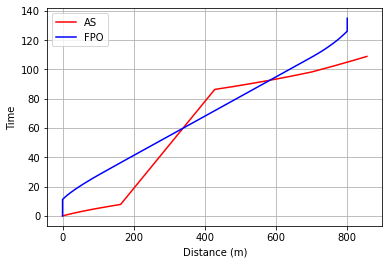

In [17]:
superpose_figure(distance,time, distance_fpo, time_fpo, "Distance (NM)", "Time (min)")

In [18]:
print(distance[-1])
print(time[-1])
print(mass[0]-mass[-1])
print(altitude[0])
print(altitude[-1])


855.29067849632
108.874595
6751.898661019994
1500.0
487.74602058


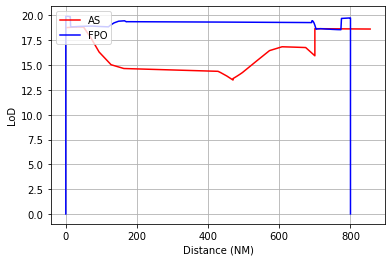

In [19]:
superpose_figure(distance, LoD, distance_fpo,
                 LoD_fpo, "Distance (NM)", "LoD")


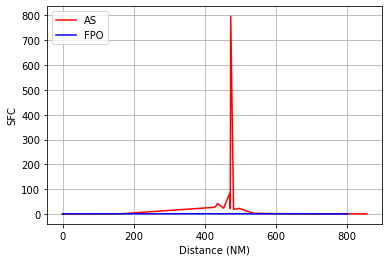

In [20]:
superpose_figure(distance, sfc, distance_fpo,
                 sfc_fpo, "Distance (NM)", "SFC")


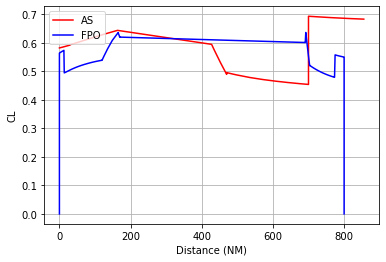

In [32]:
superpose_figure(distance, CL, distance_fpo,
                 CL_fpo/100, "Distance (NM)", "CL")


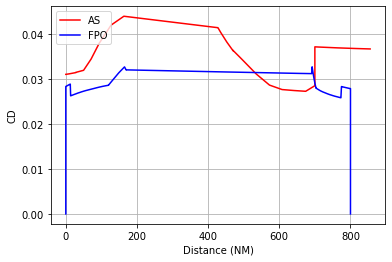

In [33]:
superpose_figure(distance, CD, distance_fpo,
                 CD_fpo/100, "Distance (NM)", "CD")


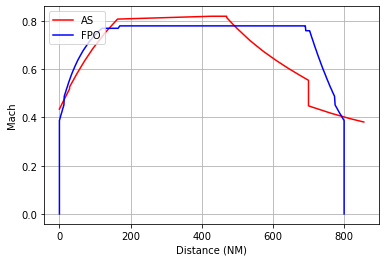

In [24]:
superpose_figure(distance, mach, distance_fpo,
                 mach_fpo, "Distance (NM)", "Mach")

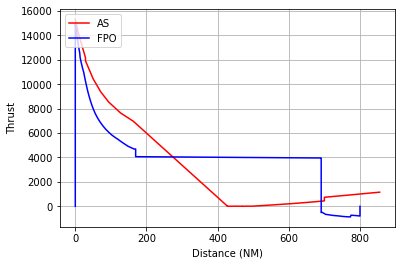

In [26]:
superpose_figure(distance, thrust/10, distance_fpo,
                 thrust_fpo, "Distance (NM)", "Thrust")


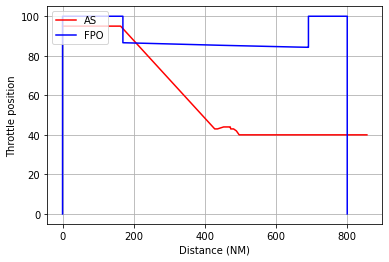

In [29]:
superpose_figure(distance, throttle*100, distance_fpo,
                 throttle_fpo, "Distance (NM)", "Throttle position")

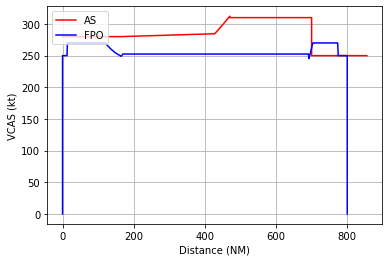

In [30]:
superpose_figure(distance, vcas, distance_fpo,
                 vcas_fpo, "Distance (NM)", "VCAS (kt)")

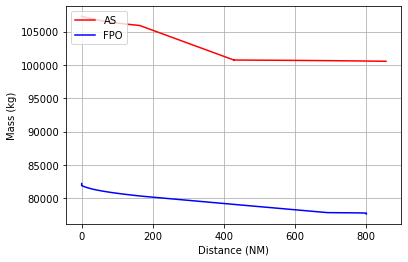

In [31]:
superpose_figure(distance, mass, distance_fpo,
                 mass_fpo, "Distance (NM)", "Mass (kg)")

In [34]:
min(sfc)

0.218821667

In [35]:
max(sfc)

796.975269

In [36]:
sfc

array([4.89100225e-01, 4.89100225e-01, 4.89100225e-01, 4.89100386e-01,
       4.89100547e-01, 4.89100708e-01, 4.89102318e-01, 4.89103929e-01,
       4.89105540e-01, 4.89121645e-01, 4.89137750e-01, 4.89153856e-01,
       4.89169961e-01, 4.89331006e-01, 4.89492040e-01, 4.89653062e-01,
       4.89814073e-01, 4.91423473e-01, 4.93031370e-01, 4.94637464e-01,
       4.96241461e-01, 4.97843072e-01, 5.13667695e-01, 5.15896999e-01,
       5.16589476e-01, 5.17280823e-01, 5.31369517e-01, 5.43369204e-01,
       5.54074749e-01, 5.67135513e-01, 5.78310195e-01, 2.66444453e+01,
       2.66444453e+01, 2.66444453e+01, 2.66446563e+01, 2.66448673e+01,
       2.66450783e+01, 2.66471884e+01, 2.66492989e+01, 2.66514097e+01,
       2.66725375e+01, 2.66937005e+01, 2.67148988e+01, 2.67361324e+01,
       2.69504343e+01, 2.71683735e+01, 2.73900437e+01, 2.76155415e+01,
       2.78449671e+01, 3.03800227e+01, 3.34500249e+01, 3.72445392e+01,
       4.20546939e+01, 2.31862623e+01, 8.32079628e+01, 2.66984256e+01,
      